# NYC Borough Classifier 

This program uses Decision Tree and Random Forest Machine Learning Algorithms to sort Latitude and Logitude locations into boroughs within New York City.  

In [1]:
#Import necessary Modules, Packages, and Libraries 
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#Jupyter magic to display plots within the notebook
%matplotlib inline

### Data from __[kaggle.com](https://www.kaggle.com/datasets)__. An open source website for public datasets.

In [3]:
df = pd.read_csv('editedAB_NYC_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
id                                48895 non-null int64
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 4.8+ MB


In [5]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


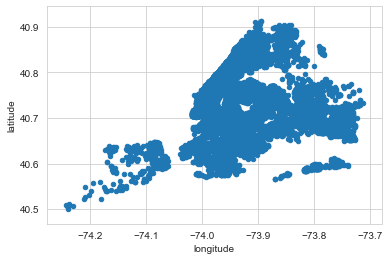

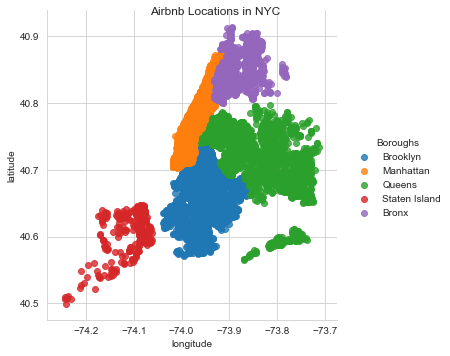

In [6]:
df.plot.scatter(x='longitude',y='latitude')
# Use the 'hue' argument to provide a factor variable
AirbnbLoc = sns.lmplot( 
    x='longitude', 
    y='latitude', 
    data=df, 
    fit_reg=False, 
    hue='neighbourhood_group', 
    legend=True)

AirbnbLoc.fig.suptitle("Airbnb Locations in NYC")
AirbnbLoc._legend.set_title("Boroughs")
plt.show(AirbnbLoc)

## Creating the Decision Trees using Scikit-learn 

In [7]:
#Assigning features and classes to training variables
X = df[['latitude','longitude']]
y = df['neighbourhood_group']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00       306
     Brooklyn       1.00      1.00      1.00      6051
    Manhattan       1.00      1.00      1.00      6474
       Queens       1.00      0.99      1.00      1721
Staten Island       1.00      1.00      1.00       117

     accuracy                           1.00     14669
    macro avg       1.00      1.00      1.00     14669
 weighted avg       1.00      1.00      1.00     14669



In [15]:
print(confusion_matrix(y_test,predictions))

[[ 305    0    1    0    0]
 [   0 6048    2    1    0]
 [   0    2 6472    0    0]
 [   0    9    1 1711    0]
 [   0    0    0    0  117]]


In [16]:
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file='tree.dot', 
                feature_names=X.columns, 
                class_names = dtree.classes_, 
                filled=True, rounded=True,   
                     special_characters=True)

In [17]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
import subprocess
subprocess.call('dir', shell=True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'nyctree.png', '-Gdpi=60'])

0

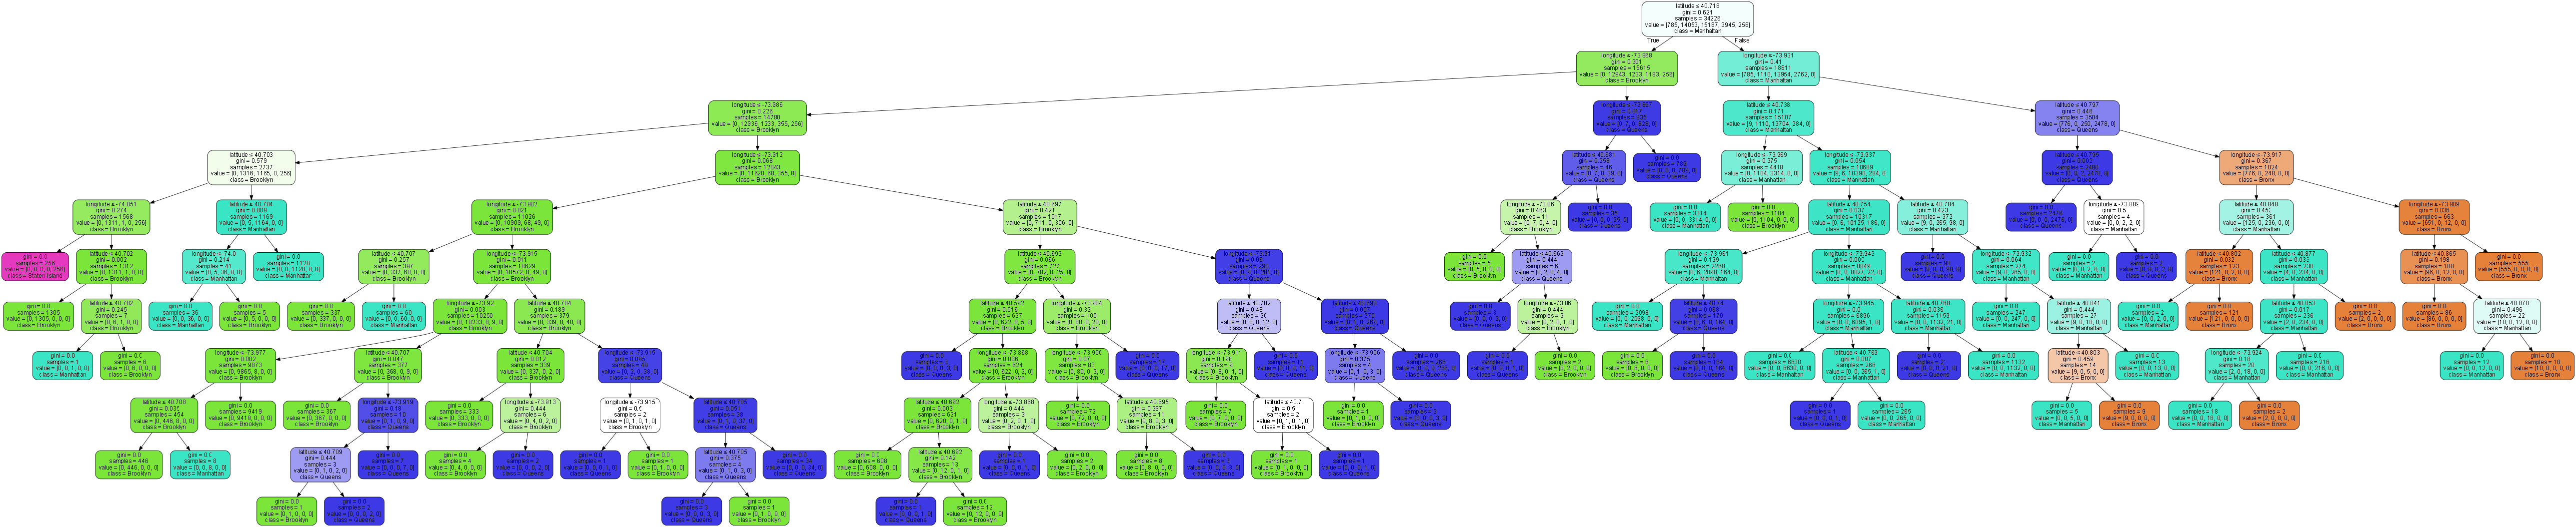

In [18]:
# Display decision tree in jupyter notebook
from IPython.display import Image
Image(filename = 'nyctree.png')

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
predictions = rfc.predict(X_test)
predictions

array(['Manhattan', 'Manhattan', 'Manhattan', ..., 'Brooklyn', 'Brooklyn',
       'Brooklyn'], dtype=object)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00       306
     Brooklyn       1.00      1.00      1.00      6051
    Manhattan       1.00      1.00      1.00      6474
       Queens       1.00      1.00      1.00      1721
Staten Island       1.00      1.00      1.00       117

     accuracy                           1.00     14669
    macro avg       1.00      1.00      1.00     14669
 weighted avg       1.00      1.00      1.00     14669



In [24]:
print(confusion_matrix(y_test,predictions))

[[ 306    0    0    0    0]
 [   0 6049    0    2    0]
 [   0    0 6474    0    0]
 [   0    5    0 1716    0]
 [   0    0    0    0  117]]
